In [36]:
# importing necessary library and classes 
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
print("libraries imported!")


libraries imported!


### Data preprocessing 

In [3]:

# Load the Iris dataset and Prepare the data
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Defining 

In [4]:
# Define the ANN model 
class ANNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANNModel, self).__init__()
        # Define the layers: Input -> Hidden -> Output
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input to hidden
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Hidden to output

    def forward(self, x):
        # Forward pass
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


### Initialize the model, define loss and optimizer


In [5]:

input_size = X.shape[1]  # Number of features in the dataset
hidden_size = 10  # Number of neurons in the hidden layer
num_classes = len(np.unique(y))  # Number of output classes (3 for Iris)

model = ANNModel(input_size, hidden_size, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


## train the model and return only loss epochs wise

In [11]:
# Train the model 
num_epochs = 500  # Number of epochs for training

for epoch in range(num_epochs):
    # Forward pass: Compute predicted output
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

## we are getting only loss here 

Epoch [100/500], Loss: 0.0149
Epoch [200/500], Loss: 0.0122
Epoch [300/500], Loss: 0.0101
Epoch [400/500], Loss: 0.0085
Epoch [500/500], Loss: 0.0071


### Code to print loss and accuracy on training data both at a time 

In [12]:
num_epochs = 500  # Number of epochs for training

for epoch in range(num_epochs):
    # Forward pass: Compute predicted output
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Calculate accuracy
    with torch.no_grad():
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
        correct = (predicted == y_train).sum().item()  # Count correct predictions
        accuracy = correct / len(y_train) * 100  # Accuracy percentage

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

# now we can see checkout loss and accuracy both during the training

Epoch [100/500], Loss: 0.0060, Accuracy: 100.00%
Epoch [200/500], Loss: 0.0052, Accuracy: 100.00%
Epoch [300/500], Loss: 0.0045, Accuracy: 100.00%
Epoch [400/500], Loss: 0.0039, Accuracy: 100.00%
Epoch [500/500], Loss: 0.0034, Accuracy: 100.00%


### to checkout the accuracy and loss on validation data


In [28]:
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    val_outputs = model(X_test)
    val_loss = criterion(val_outputs, y_test)
    _, val_predicted = torch.max(val_outputs, 1)
    val_correct = (val_predicted == y_test).sum().item()
    val_accuracy = val_correct / len(y_test) * 100
    print(f"validation accuracy : {val_accuracy:.2f}  and val loss {val_loss * 100 :.2f}")

validation accuracy : 93.33  and val loss 14.17


### Save the model after training


In [8]:
torch.save(model.state_dict(), 'iris_ann_model.pth')
print("Model saved to iris_ann_model.pth")


Model saved to iris_ann_model.pth


### Load the model for inference


In [9]:
loaded_model = ANNModel(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load('iris_ann_model.pth'))
loaded_model.eval()  # Set the model to evaluation mode

print("Model loaded from iris_ann_model.pth")


Model loaded from iris_ann_model.pth


C:\Users\Ranjit\AppData\Local\Temp\ipykernel_14144\2449039693.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('iris_ann_model.pth

### Example 2 


In [45]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANNModel, self).__init__()
        # Define the layers: Input -> Hidden -> Output
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input to hidden
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Hidden to output

    def forward(self, x):
        # Forward pass
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model, define loss and optimizer
input_size = X.shape[1]  # Number of features in the dataset
hidden_size = 10  # Number of neurons in the hidden layer
num_classes = len(np.unique(y))  # Number of output classes (3 for Iris)

model = ANNModel(input_size, hidden_size, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define a history dictionary to store loss and accuracy
history = {
    'train_loss': [],
    'train_accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

# Training the model
num_epochs = 100

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    outputs = model(X_train)  # Forward pass on training data
    loss = criterion(outputs, y_train)  # Compute training loss

    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Calculate training accuracy
    with torch.no_grad():
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        correct = (predicted == y_train).sum().item()  # Count correct predictions
        train_accuracy = correct / len(y_train) * 100  # Compute training accuracy

    # Validation phase
    model.eval()  # Set the model to evaluation mode (no gradient calculation)
    with torch.no_grad():
        val_outputs = model(X_val)  # Forward pass on validation data
        val_loss = criterion(val_outputs, y_val)  # Compute validation loss

        # Calculate validation accuracy
        _, val_predicted = torch.max(val_outputs, 1)  # Get predicted labels for validation set
        val_correct = (val_predicted == y_val).sum().item()  # Count correct validation predictions
        val_accuracy = val_correct / len(y_val) * 100  # Compute validation accuracy

    # Store the metrics for this epoch
    history['train_loss'].append(loss.item())
    history['train_accuracy'].append(train_accuracy)
    history['val_loss'].append(val_loss.item())
    history['val_accuracy'].append(val_accuracy)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
                f'Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.2f}%, '
                f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.2f}%')

Epoch [10/100], Train Loss: 0.6103, Train Accuracy: 81.67%, Val Loss: 0.5448, Val Accuracy: 90.00%
Epoch [20/100], Train Loss: 0.4236, Train Accuracy: 84.17%, Val Loss: 0.3496, Val Accuracy: 93.33%
Epoch [30/100], Train Loss: 0.3361, Train Accuracy: 88.33%, Val Loss: 0.2626, Val Accuracy: 93.33%
Epoch [40/100], Train Loss: 0.2769, Train Accuracy: 89.17%, Val Loss: 0.2094, Val Accuracy: 93.33%
Epoch [50/100], Train Loss: 0.2251, Train Accuracy: 91.67%, Val Loss: 0.1706, Val Accuracy: 96.67%
Epoch [60/100], Train Loss: 0.1784, Train Accuracy: 96.67%, Val Loss: 0.1399, Val Accuracy: 96.67%
Epoch [70/100], Train Loss: 0.1400, Train Accuracy: 95.83%, Val Loss: 0.1179, Val Accuracy: 96.67%
Epoch [80/100], Train Loss: 0.1115, Train Accuracy: 96.67%, Val Loss: 0.0959, Val Accuracy: 96.67%
Epoch [90/100], Train Loss: 0.0933, Train Accuracy: 96.67%, Val Loss: 0.0788, Val Accuracy: 96.67%
Epoch [100/100], Train Loss: 0.0822, Train Accuracy: 96.67%, Val Loss: 0.0685, Val Accuracy: 96.67%


<Axes: >

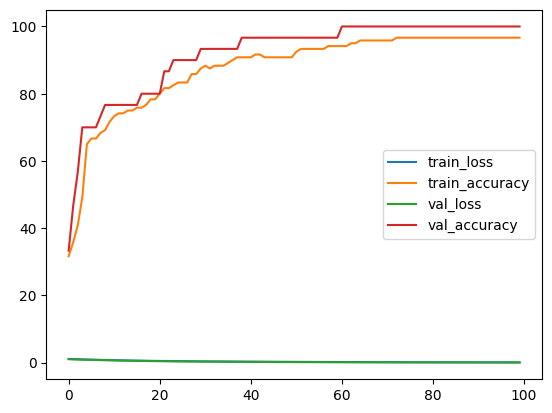

In [39]:
his_df = pd.DataFrame(history) 
his_df.plot()

# THANK YOU ❤